In [61]:
import pandas as pd
import nfl_data_py as nfl
from datetime import date
from team_functions import map_team_abbreviations
from elo_functions import calculate_elo_history, create_team_elo_chart

In [62]:
# update game list
# !python download_games.py
df = nfl.import_schedules(years=range(1999, 2026))
df = map_team_abbreviations(df)
completed_games = df[df['result'].notna()]
upcoming_games = df[df['result'].isna()]

In [63]:
elo_prep = completed_games[['game_id','season','game_type','gameday', 'week','away_team','home_team','away_score','home_score']]

In [64]:
# 1. CALCULATE ELO HISTORY
elo_prep = calculate_elo_history(elo_prep, k=10)

# 2. CREATE THE CHART
team_elo_chart = create_team_elo_chart(elo_prep)
team_elo_chart

team                 ARI          ATL          BAL          BUF          CAR  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1495.000000  1495.000000   
       3     1500.000000  1490.143872  1490.143872  1500.000000  1490.143872   
       4     1495.002070  1485.357539  1495.143872  1504.856128  1495.142837   
       5     1490.215707  1480.498338  1500.003072  1509.930149  1495.142837   
...                  ...          ...          ...          ...          ...   
2025   8     1429.956759  1459.723340  1575.943166  1622.138363  1397.688001   
       9     1426.946465  1455.008645  1578.877739  1624.293440  1395.532924   
       10    1433.317071  1450.733702  1582.549102  1630.145484  1403.008171   
       11    1430.059151  1446.460927  1587.120189  1623.117255  1398.939389   
       12    1426.640197  1440.781270  1589.795079  1626.838133  1398.939389   

team                 CHI          CIN          CLE          DAL          DEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1505.000000  1495.000000   
       3     1499.856128  1490.071951  1490.143872  1505.000000  1490.000000   
       4     1494.860269  1485.072986  1485.143872  1509.856128  1485.143872   
       5     1499.932160  1480.428041  1480.570397  1514.642491  1480.143902   
...                  ...          ...          ...          ...          ...   
2025   8     1423.305797  1523.103349  1421.547917  1530.248655  1490.924751   
       9     1420.371224  1516.044948  1421.547917  1524.685143  1496.488263   
       10    1426.714301  1516.044948  1417.683879  1524.685143  1501.044779   
       11    1431.137878  1509.701870  1412.116852  1518.314536  1504.853243   
       12    1437.760277  1505.395948  1409.441962  1518.314536  1504.853243   

team         ...           NO          NYG          NYJ          PHI  \
season week  ...                                                       
1999   1     ...  1500.000000  1500.000000  1500.000000  1500.000000   
       2     ...  1505.000000  1505.000000  1495.000000  1495.000000   
       3     ...  1505.000000  1499.856128  1490.000000  1490.000000   
       4     ...  1499.856128  1495.002069  1485.145941  1485.143872   
       5     ...  1494.784237  1499.860236  1490.145911  1480.285705   
...          ...          ...          ...          ...          ...   
2025   8     ...  1476.498032  1391.493867  1371.054165  1619.285864   
       9     ...  1472.310010  1389.371133  1371.054165  1619.285864   
       10    ...  1468.479952  1386.481394  1378.112566  1621.408598   
       11    ...  1468.479952  1382.057818  1383.679594  1625.767589   
       12    ...  1472.548734  1379.550849  1380.489562  1625.767589   

team                 PIT          SEA           SF           TB          TEN  \
season week                                                                    
1999   1     1500.000000  1500.000000  1500.000000  1500.000000  1500.000000   
       2     1505.000000  1495.000000  1495.000000  1495.000000  1505.000000   
       3     1509.856128  1500.143872  1500.143872  1500.000000  1509.856128   
       4     1504.716394  1505.283606  1505.141801  1504.856128  1514.856128   
       5     1499.718405  1505.283606  1510.281565  1499.712286  1509.716364   
...                  ...          ...          ...          ...          ...   
2025   8     1564.598319  1552.237353  1552.086503  1533.424036  1411.977993   
       9     1559.809868  1555.981039  1545.781875  1533.424036  1408.246978   
       10    1564.039607  1559.658454  1548.671614  1537.612058  1408.246978   
       11    1558.244781  1562.916374  1543.819782  1532.215858  1404.600327   
       12    1562.550

In [65]:
from plotting_functions import plot_elo_every_season
# plot_elo_every_season(['NE', 'KC', 'DET'], team_elo_chart)

# Performance of base model
With a Brier score of 0.2330, the model demonstrates legitimate predictive skill well below the random-guessing threshold of 0.25, validating that the core Elo algorithm is successfully capturing team strength differentials.

The base model achieved an accuracy of 61.34%, which successfully outperforms the naive baseline of blindly picking the home team (~57%) but indicates room for improvement to reach the industry standard of ~65%.

The matrix reveals a conservative bias regarding Home Field Advantage, as the model missed 1,480 actual home victories (False Negatives), suggesting a missing HFA factor.

(all with a k factor of 20)

In [66]:
from sklearn.metrics import brier_score_loss, accuracy_score, confusion_matrix
def calc_elo_win(A, B):
    awin = 1 / (1 + 10**( (B - A) / 400))
    return(awin)

def elo_win_prob(elo_prep):
    ''' to be run after you calculate elo history '''
    elo_prep['home_win_prob']=elo_prep.apply(lambda row: calc_elo_win(row['home_elo'], row['away_elo']), axis=1)
    elo_prep['away_win_prob']=1-elo_prep['home_win_prob']
    return elo_prep

def get_elo_metrics(elo_prep):
    ''' to be run after you calculate elo history '''
    min_season = elo_prep['season'].min()
    elo_prep_testing = elo_prep[elo_prep['season'] > min_season + 1]

    win_outcome = elo_prep_testing['home_score'] > elo_prep_testing['away_score']
    win_outcome = win_outcome.astype(int)

    win_predict_bin = elo_prep_testing['home_win_prob'] > 0.5
    win_predict_bin = win_predict_bin.astype(int)

    brier_score = brier_score_loss(win_outcome, elo_prep_testing['home_win_prob'])
    accuracy = accuracy_score(win_outcome, win_predict_bin)
    confusion = confusion_matrix(win_outcome, win_predict_bin)
    return brier_score, accuracy, confusion

elo_20 = calculate_elo_history(elo_prep, k=20)
elo_20 = elo_win_prob(elo_20)
brier_20, accuracy_20, confusion_20 = get_elo_metrics(elo_20)
print(brier_20, '\n', accuracy_20, '\n', confusion_20)

0.23300830556874 
 0.6135679903730445 
 [[1821 1088]
 [1481 2258]]


## Compared to random guessing: 

Brier Score: 0.331

Accuracy: 49.8%

Compared to always picking the home team: 
Brier Score: 0.437

Accuracy: 56.2%

In [67]:
# random guessing
import numpy as np

win_outcome = elo_20['home_score'] > elo_20['away_score']
win_outcome = win_outcome.astype(int)

outcome_guessed = np.random.rand(win_outcome.shape[0])
outcome_guessed_bin = outcome_guessed > 0.5
brier_score_random = brier_score_loss(win_outcome, outcome_guessed)
accuracy_random = accuracy_score(win_outcome, outcome_guessed_bin)

home_always_wins = np.ones(win_outcome.shape[0])
home_always_wins_bin = home_always_wins.astype(int)
brier_score_home = brier_score_loss(win_outcome, home_always_wins)
accuracy_home = accuracy_score(win_outcome, home_always_wins_bin)

print("Random Guessing")
print(brier_score_random)
print(accuracy_random)
print("Home Always Wins")
print(brier_score_home)
print(accuracy_home)    

Random Guessing
0.3322507059856003
0.501255930784259
Home Always Wins
0.43622662573262627
0.5637733742673737


# Grid search for K-factor

In [68]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from elo_functions import EloEstimator

# Prepare data for Grid Search
# Ensure data is sorted by time
X = elo_prep.sort_values(by=['season', 'week']).reset_index(drop=True)
y = (X['home_score'] > X['away_score']).astype(int)

# Define parameter grid
param_grid = {'k': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]}

# Time Series Split to respect temporal order
tscv = TimeSeriesSplit(n_splits=5)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=EloEstimator(),
    param_grid=param_grid,
    cv=tscv,
    scoring=None, # Uses the estimator's score method (negative brier score)
    n_jobs=10 # Sequential execution
)

# Run Grid Search
print("Running Grid Search...")
grid_search.fit(X, y)

print(f"Best K: {grid_search.best_params_['k']}")
print(f"Best Score (Negative Brier): {grid_search.best_score_}")

Running Grid Search...
Best K: 35
Best Score (Negative Brier): -0.2305128714856568


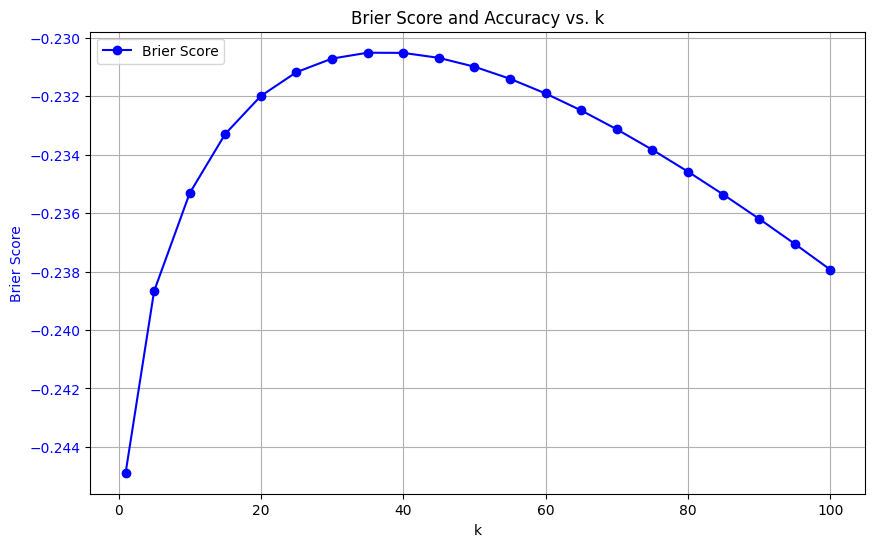

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.DataFrame(grid_search.cv_results_)

k_values_col = next((col for col in results_df.columns if 'param_' in col and ('k' in col or 'n_neighbors' in col)), None)

if k_values_col:
    k_values = results_df[k_values_col].values
    brier_scores = results_df['mean_test_score'].copy()

    if hasattr(grid_search, 'scorer_') and 'brier_score_loss' in str(grid_search.scorer_).lower() and brier_scores.mean() < 0:
        brier_scores = -brier_scores
        
    # print(pd.DataFrame({k_values_col: k_values, 'brier_score': brier_scores}))

    plt.figure(figsize=(10, 6))
    plt.plot(k_values, brier_scores, marker='o', label='Brier Score', color='blue')
    plt.xlabel(k_values_col.replace('param_', ''))
    plt.ylabel('Brier Score', color='blue')
    plt.tick_params(axis='y', labelcolor='blue')
    plt.title('Brier Score and Accuracy vs. k')
    plt.grid(True)

    if 'mean_test_accuracy' in results_df.columns:
        ax2 = plt.gca().twinx()
        ax2.plot(k_values, results_df['mean_test_accuracy'].values, marker='x', label='Accuracy', color='red')
        ax2.set_ylabel('Accuracy', color='red')
        ax2.tick_params(axis='y', labelcolor='red')
        ax2.legend(loc='upper right')
    
    plt.legend(loc='upper left')
    plt.show()
else:
    print("Could not find 'k' or 'n_neighbors' parameter in grid_search results.")


In [70]:
elo_35 = calculate_elo_history(elo_prep, k=35)
elo_35 = elo_win_prob(elo_35)
brier_35, accuracy_35, confusion_35 = get_elo_metrics(elo_35)
print(brier_35, '\n', accuracy_35, '\n', confusion_35)

0.23182812952343132 
 0.618531889290012 
 [[1852 1057]
 [1479 2260]]


# finding HFA

In [71]:
from sklearn.linear_model import LinearRegression
df_reg = elo_35.copy()

# Create Elo difference feature
df_reg['elo_diff'] = df_reg['home_elo'] - df_reg['away_elo']
df_reg['MOV'] = df_reg['home_score'] - df_reg['away_score']
X = df_reg[['elo_diff']]
y = df_reg['MOV']

# Train Logistic Regression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

hfa_points = model.intercept_
slope = model.coef_[0]
elo_divisor = 1/slope
hfa_elo_adjustment = hfa_points * elo_divisor

# 4. Print Results
print(f"--- GLOBAL REGRESSION RESULTS (K=35) ---")
print(f"Home Field Advantage (Points): {hfa_points:.4f}")
print(f"Elo-to-Points Divisor:         {elo_divisor:.4f}")
print(f"Home Field Advantage (Elo):    {hfa_elo_adjustment:.4f}")
print("-" * 40)
print(f"New Formula: Spread = (Elo_Diff + {hfa_elo_adjustment:.0f}) / {elo_divisor:.1f}")

--- GLOBAL REGRESSION RESULTS (K=35) ---
Home Field Advantage (Points): 2.3836
Elo-to-Points Divisor:         31.2737
Home Field Advantage (Elo):    74.5436
----------------------------------------
New Formula: Spread = (Elo_Diff + 75) / 31.3


In [72]:
from sklearn.linear_model import LinearRegression

elo_df = calculate_elo_history(elo_prep, k=35)
elo_df = elo_win_prob(elo_df)

# 1. Filter for games with results (Drop future games)
df_reg = elo_df.dropna().copy()

# 2. Define Features (X) and Target (y)
# X = Raw Elo Difference (Home - Away)
df_reg['elo_diff'] = df_reg['home_elo'] - df_reg['away_elo']
X = df_reg[['elo_diff']]

# y = Actual Margin of Victory (Points)
df_reg['MOV'] = df_reg['home_score'] - df_reg['away_score']
y = df_reg['MOV']

# 3. Train Linear Regression
# fit_intercept=True is required. The intercept represents the HFA.
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# 4. Extract Constants
hfa_points = model.intercept_  # This is 'b' (Value of Home Field when Elos are equal)
slope = model.coef_[0]         # This is 'm' (How many points 1 Elo unit is worth)

elo_divisor = 1 / slope
hfa_elo_adjustment = hfa_points * elo_divisor

# 5. Print Results
print(f"--- GLOBAL REGRESSION RESULTS (K=35) ---")
print(f"Home Field Advantage (Points): {hfa_points:.4f}")
print(f"Elo-to-Points Divisor:         {elo_divisor:.4f}")
print(f"Home Field Advantage (Elo):    {hfa_elo_adjustment:.4f}")
print("-" * 40)
print(f"New Formula: Spread = (Elo_Diff + {hfa_elo_adjustment:.0f}) / {elo_divisor:.1f}")
r_squared = model.score(X, y)
print(f"R-squared:                     {r_squared:.4f}")
import statsmodels.api as sm

# Add a constant to the independent variable for statsmodels
X_sm = sm.add_constant(X)

# Fit the OLS model
sm_model = sm.OLS(y, X_sm)
results = sm_model.fit()

# Print the p-value for the 'elo_diff' coefficient
print(f"P-value for elo_diff:          {results.pvalues['elo_diff']}")




--- GLOBAL REGRESSION RESULTS (K=35) ---
Home Field Advantage (Points): 2.3836
Elo-to-Points Divisor:         31.2737
Home Field Advantage (Elo):    74.5436
----------------------------------------
New Formula: Spread = (Elo_Diff + 75) / 31.3
R-squared:                     0.1127
P-value for elo_diff:          3.238903087717761e-188


In [73]:
def elo_win_prob(elo_prep, HFA_elo_adjustment=0):
    ''' to be run after you calculate elo history '''
    elo_prep['home_win_prob']=elo_prep.apply(lambda row: calc_elo_win(row['home_elo']+HFA_elo_adjustment, row['away_elo']), axis=1)
    elo_prep['away_win_prob']=1-elo_prep['home_win_prob']
    return elo_prep

def fit_HFA_elo(df, k=35):
    from sklearn.linear_model import LinearRegression
    # 1. Filter for games with results (Drop future games)
    df_reg = df.dropna().copy()

    # X = Raw Elo Difference (Home - Away)
    df_reg['elo_diff'] = df_reg['home_elo'] - df_reg['away_elo']
    X = df_reg[['elo_diff']]

    # y = Actual Margin of Victory (Points)
    df_reg['MOV'] = df_reg['home_score'] - df_reg['away_score']
    y = df_reg['MOV']

    # 3. Train Linear Regression
    model = LinearRegression(fit_intercept=True)
    model.fit(X, y)

    # 4. Extract Constants
    hfa_points = model.intercept_  # This is 'b' (Value of Home Field when Elos are equal)
    slope = model.coef_[0]         # This is 'm' (How many points 1 Elo unit is worth)

    elo_divisor = 1 / slope
    hfa_elo_adjustment = hfa_points * elo_divisor

    return hfa_elo_adjustment, elo_divisor

In [74]:
# recursive fit
# first step
elo_df_1 = calculate_elo_history(elo_prep, k=35, HFA_elo_adjustment=0)
elo_df_1 = elo_win_prob(elo_df_1, HFA_elo_adjustment=0)
brier_score, accuracy, confusion = get_elo_metrics(elo_df_1)
print('base score')
print(brier_score, '\n', accuracy, '\n', confusion)

# get HFA, get stats
HFA_elo_adjustment, elo_divisor = fit_HFA_elo(elo_df_1, k=35)
elo_df_1_w_HFA = elo_win_prob(elo_df_1, HFA_elo_adjustment=HFA_elo_adjustment)
brier_score, accuracy, confusion = get_elo_metrics(elo_df_1_w_HFA)
print('HFA score')
print(brier_score, '\n', accuracy, '\n', confusion)
print(f"HFA_elo_adjustment: {HFA_elo_adjustment}")
print(f"elo_divisor: {elo_divisor}")

# repeat elo generation with HFA

elo_df_2 = calculate_elo_history(elo_df_1_w_HFA, k=35, HFA_elo_adjustment=HFA_elo_adjustment)
elo_df_2 = elo_win_prob(elo_df_2, HFA_elo_adjustment=HFA_elo_adjustment)
brier_score, accuracy, confusion = get_elo_metrics(elo_df_2)
print('HFA score 2')
print(brier_score, '\n', accuracy, '\n', confusion)

# recalculate HFA
HFA_elo_adjustment, elo_divisor = fit_HFA_elo(elo_df_2, k=35)
elo_df_2_w_HFA = elo_win_prob(elo_df_2, HFA_elo_adjustment=HFA_elo_adjustment)
brier_score, accuracy, confusion = get_elo_metrics(elo_df_2_w_HFA)
print('HFA score 2 w HFA')
print(brier_score, '\n', accuracy, '\n', confusion)
print(f"HFA_elo_adjustment: {HFA_elo_adjustment}")

for hfa_val in range(70, 81):
    elo_df_scan = elo_win_prob(elo_df_2, HFA_elo_adjustment=hfa_val)
    brier_score, accuracy, _ = get_elo_metrics(elo_df_scan)
    print(f"HFA: {hfa_val}, Brier Score: {brier_score:.4f}, Accuracy: {accuracy:.4f}")


HFA_elo_adjustment, elo_divisor = fit_HFA_elo(elo_df_1, k=35)



# # second step
# elo_

base score
0.23182812952343132 
 0.618531889290012 
 [[1852 1057]
 [1479 2260]]
HFA score
0.2284471737335829 
 0.6295126353790613 
 [[1273 1636]
 [ 827 2912]]
HFA_elo_adjustment: 74.54360156892982
elo_divisor: 31.273719795686866
HFA score 2
0.22924721159610156 
 0.6298134777376655 
 [[1262 1647]
 [ 814 2925]]
HFA score 2 w HFA
0.22917410372656305 
 0.6295126353790613 
 [[1270 1639]
 [ 824 2915]]
HFA_elo_adjustment: 73.40407026549873
HFA: 70, Brier Score: 0.2290, Accuracy: 0.6316
HFA: 71, Brier Score: 0.2290, Accuracy: 0.6315
HFA: 72, Brier Score: 0.2291, Accuracy: 0.6306
HFA: 73, Brier Score: 0.2291, Accuracy: 0.6297
HFA: 74, Brier Score: 0.2292, Accuracy: 0.6294
HFA: 75, Brier Score: 0.2293, Accuracy: 0.6300
HFA: 76, Brier Score: 0.2293, Accuracy: 0.6306
HFA: 77, Brier Score: 0.2294, Accuracy: 0.6312
HFA: 78, Brier Score: 0.2295, Accuracy: 0.6303
HFA: 79, Brier Score: 0.2296, Accuracy: 0.6306
HFA: 80, Brier Score: 0.2296, Accuracy: 0.6298


In [75]:
74.70811398448095/31.280379218973415

2.3883378606601426

In [76]:
# Residual Boosting Approach
from residual_boosting import prepare_residual_data, train_residual_models

# 1. Prepare Data
# We need the original games dataframe for features (stadium, wind, etc.)
# Assuming 'df' from earlier cells contains the full games data
# And 'elo_prep' contains the Elo predictions (after calculate_elo_history)

print("Preparing data for residual boosting...")
residual_df = prepare_residual_data(elo_prep, df)

# 2. Train Models
print("Training residual models...")
rf_scores, gb_scores = train_residual_models(residual_df)


Preparing data for residual boosting...
Training residual models...


KeyError: ['week']

Preparing data for Residual Boosting...
Training models...

--- RESIDUAL BOOSTING RESULTS (2023-Present) ---
Baseline Elo RMSE:       13.3425 (Lower is better)
Random Forest Corrected: 13.5309 (Improvement: -0.1884)
XGBoost Corrected:       13.3340 (Improvement: 0.0085)


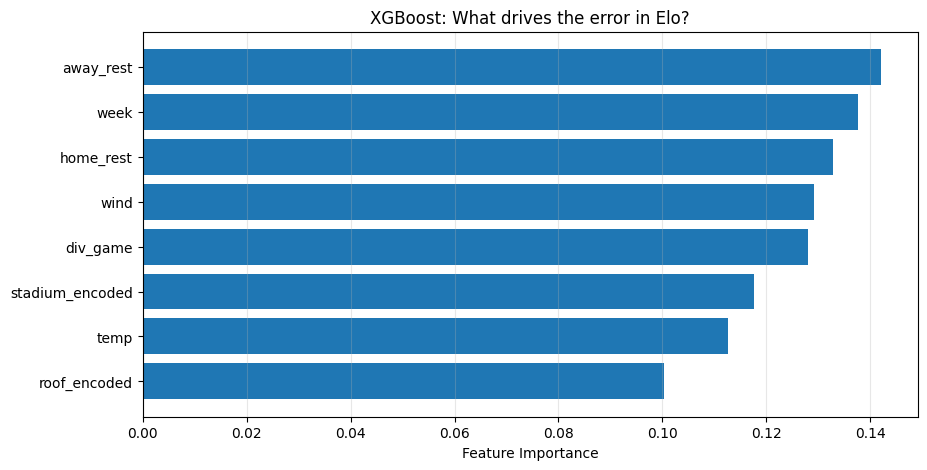

In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# ==========================================
# 1. DATA PREPARATION & MERGING
# ==========================================
print("Preparing data for Residual Boosting...")

# Use the optimized Elo dataframe you generated in the previous step
# We copy it to avoid SettingWithCopy warnings
working_elo = elo_df_2.copy()

# Define the HFA and Divisor you found in your regression
HFA_VAL = 74.54  
DIVISOR = 31.27  

# Calculate the "Base" Predicted Margin (Pure Elo)
# Formula: (Home_Elo + HFA - Away_Elo) / Divisor
working_elo['elo_diff_effective'] = (working_elo['home_elo'] + HFA_VAL) - working_elo['away_elo']
working_elo['predicted_margin'] = working_elo['elo_diff_effective'] / DIVISOR

# Calculate the Target: The Residual (What Elo missed)
# If Elo says +3 and result is +10, Residual is +7 (Elo under-predicted)
working_elo['actual_margin'] = working_elo['home_score'] - working_elo['away_score']
working_elo['residual'] = working_elo['actual_margin'] - working_elo['predicted_margin']

# Features we want from the original 'df' (nfl_data_py schedule)
feature_cols = [
    'game_id', 'week', 'div_game', 'roof', 'surface', 'temp', 'wind',
    'home_rest', 'away_rest', 'stadium_id'
]

# Select only needed columns to avoid duplicate errors
df_features = df[feature_cols].copy()

# Merge Elo data with Context Features
# We use 'inner' merge on game_id to ensure we match the exact game
full_df = pd.merge(working_elo, df_features, on='game_id', how='inner', suffixes=('', '_raw'))

# Handle duplicate columns if they appeared
if 'week_raw' in full_df.columns:
    full_df.drop(columns=['week_raw'], inplace=True)

# ==========================================
# 2. CLEANING & FEATURE ENGINEERING
# ==========================================

# A. Handle Weather NaNs
# If roof is 'dome' or 'closed', set temp=70, wind=0
full_df.loc[full_df['roof'].isin(['dome', 'closed']), 'temp'] = 70
full_df.loc[full_df['roof'].isin(['dome', 'closed']), 'wind'] = 0

# Fill remaining weather NaNs with average (simple imputation)
full_df['temp'] = full_df['temp'].fillna(full_df['temp'].mean())
full_df['wind'] = full_df['wind'].fillna(full_df['wind'].mean())

# B. Handle Rest NaNs (Default to 7 days)
full_df['home_rest'] = full_df['home_rest'].fillna(7)
full_df['away_rest'] = full_df['away_rest'].fillna(7)

# C. Encode Categorical Data (Stadiums, Roof, Surface)
# XGBoost/RF need numbers, not strings
le = LabelEncoder()
full_df['roof_encoded'] = le.fit_transform(full_df['roof'].astype(str))
full_df['surface_encoded'] = le.fit_transform(full_df['surface'].astype(str))
full_df['stadium_encoded'] = le.fit_transform(full_df['stadium_id'].astype(str))

# Define the Final Feature List for the Model
ml_features = [
    'week',               # Time of season
    'div_game',           # Is it a rivalry?
    'temp', 'wind',       # Weather impacts scoring variance
    'home_rest', 'away_rest', # Fatigue
    'stadium_encoded',    # The "Lambeau Effect" (specific HFA)
    'roof_encoded'        # Dome vs Outdoors
]

# Drop rows where we still might have NaNs (should be zero now)
ml_data = full_df.dropna(subset=ml_features + ['residual']).copy()

# ==========================================
# 3. TRAINING (Train on Past, Test on Future)
# ==========================================
print("Training models...")

# Split: Train on 1999-2022, Test on 2023-Present
split_season = 2022
train_data = ml_data[ml_data['season'] <= split_season]
test_data = ml_data[ml_data['season'] > split_season]

X_train = train_data[ml_features]
y_train = train_data['residual']
X_test = test_data[ml_features]
y_test = test_data['residual']

# --- Model A: Random Forest ---
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=10, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# --- Model B: XGBoost ---
gbm = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
gbm.fit(X_train, y_train)
gbm_preds = gbm.predict(X_test)

# ==========================================
# 4. EVALUATION
# ==========================================

# 1. Baseline RMSE (Pure Elo)
# The error is just the residual itself (since the ML model effectively predicts 0 correction)
baseline_rmse = np.sqrt(mean_squared_error(y_test, np.zeros_like(y_test)))

# 2. ML Corrected RMSE
# If ML predicts the residual perfectly, the new error is 0.
# So we measure RMSE of (Actual_Residual - Predicted_Residual)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
gbm_rmse = np.sqrt(mean_squared_error(y_test, gbm_preds))

print(f"\n--- RESIDUAL BOOSTING RESULTS (2023-Present) ---")
print(f"Baseline Elo RMSE:       {baseline_rmse:.4f} (Lower is better)")
print(f"Random Forest Corrected: {rf_rmse:.4f} (Improvement: {baseline_rmse - rf_rmse:.4f})")
print(f"XGBoost Corrected:       {gbm_rmse:.4f} (Improvement: {baseline_rmse - gbm_rmse:.4f})")

# ==========================================
# 5. FEATURE IMPORTANCE GRAPH
# ==========================================
plt.figure(figsize=(10, 5))
# Sort features by importance
sorted_idx = gbm.feature_importances_.argsort()
plt.barh(np.array(ml_features)[sorted_idx], gbm.feature_importances_[sorted_idx])
plt.title("XGBoost: What drives the error in Elo?")
plt.xlabel("Feature Importance")
plt.grid(axis='x', alpha=0.3)
plt.show()

In [78]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.6 MB/s eta 0:00:00a 0:00:01
